In [1]:
# Author: Daniele Zanzi
# notebook based on: 
# https://gitlab.cern.ch/atlas-tdaq-software/beauty/-/blob/master/test/ipynb/beauty.ipynb (Wainer Vandelli)
# https://cernbox.cern.ch/index.php/s/FIoXzgs4wHXyCQ4 (Heather Russel)

import getpass
import os
#os.system("echo '%s' | kinit" % getpass.getpass())
#output should be 0

In [2]:
%matplotlib notebook
import sys
sys.path.append(os.environ['CERNBOX_HOME'] + '/SWAN_projects/trigger-rates-with-swan/beauty/python')
#print(sys.path)

from beauty import Beauty
import beauty.stores as st
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pytz
import json

#these make the plots look more ATLAS-like
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

In [3]:
beauty = None
#beauty = Beauty(server='https://atlasop.cern.ch', timezone='Europe/Zurich')
beauty = Beauty(server='https://vm-atlas-tdaq-cc.cern.ch/tbed/pbeast/api/', timezone='Europe/Zurich')
# more info at https://twiki.cern.ch/twiki/bin/view/Atlas/DaqHltPBeast 

In [4]:
# For access outside P1, data are stored on EOS after 1 week (see README)
# time interval: y, m, d, h, m, s
since = dt.datetime(2022, 8, 23, 0, 0, 0) #, tzinfo=pytz.timezone('Europe/Zurich'))

till = dt.datetime(2022, 8, 23, 12, 0, 0) #, tzinfo=pytz.timezone('Europe/Zurich'))

cet = pytz.timezone('Europe/Zurich')
offset = cet.utcoffset(since)
print(offset)

2:00:00


In [5]:
# TRP dashboard: https://atlasop.cern.ch/tdaq/pbeastDashboard/d/iItbciwWk/full-trp-dashboard?orgId=1&refresh=30s&from=now-1d&to=now
# HLT dashboard: https://atlasop.cern.ch/tdaq/pbeastDashboard/d/000000034/hlt-overview?orgId=1&refresh=30s 
# List of triggers: https://twiki.cern.ch/twiki/bin/view/Atlas/LowestUnprescaled

# TEST
#HLT_trigger_list = [
#    'HLT_mu24_ivarmedium_L1MU14FCH',
#    'HLT_mu50_L1MU14FCH',
#    'HLT_e26_lhtight_ivarloose_L1EM22VHI',
#    'HLT_xe65_cell_xe90_pfopufit_L1XE50',
#    'HLT_xe80_cell_xe115_tcpufit_L1XE50',
#    #'HLT_j420_pf_ftf_preselj225_L1J100',
#    #'HLT_j220f_L1J75p31ETA49',
#]

#L1_trigger_list = [
#    'L1_MU14FCH',
#    'L1_EM22VHI',
#    'L1_XE50',
#    'L1_J100',
#    'L1_J75p31ETA49',
#]

signaures = {}

# muons
HLT_trigger_list = [
    'HLT_mu24_ivarmedium_L1MU14FCH',
    'HLT_mu50_L1MU14FCH',
    'HLT_mu60_0eta105_msonly_L1MU14FCH',
    'HLT_mu22_mu8noL1_L1MU14FCH',
    'HLT_2mu14_L12MU8F',
    'HLT_3mu6_L13MU5VF',
]

L1_trigger_list = [
    'L1_MU14FCH',
    'L1_2MU8F',
    'L1_3MU5VF',
]

signaures.update({'muons': [HLT_trigger_list,L1_trigger_list]})

# electrons
HLT_trigger_list = [
    'HLT_e26_lhtight_ivarloose_L1EM22VHI',
    'HLT_e60_lhmedium_L1EM22VHI',
    'HLT_e140_lhloose_L1EM22VHI',
    'HLT_e300_etcut_L1EM22VHI',
    'HLT_2e17_lhvloose_L12EM15VHI',
]

L1_trigger_list = [
    'L1_EM22VHI',
    'L1_2EM15VHI',
]

signaures.update({'electrons': [HLT_trigger_list,L1_trigger_list]})

# electrons+muons
HLT_trigger_list = [
    'HLT_e12_lhloose_2mu10_L12MU8F',
    'HLT_e17_lhloose_mu14_L1EM15VH_MU8F',
    'HLT_e26_lhmedium_mu8noL1_L1EM22VHI',
    'HLT_e7_lhmedium_mu24_L1MU14FCH',
    'HLT_2e12_lhloose_mu10_L12EM8VH_MU8F',
]

L1_trigger_list = [
    'L1_2MU8F',
    'L1_EM15VH_MU8F',
    'L1_EM22VHI',
    'L1_MU14FCH',
    'L1_2EM8VH_MU8F',
]

signaures.update({'elmu': [HLT_trigger_list,L1_trigger_list]})

#photons
HLT_trigger_list = [
    'HLT_g140_loose_L1EM22VHI',
    'HLT_g35_medium_g25_medium_L12EM20VH',
    'HLT_2g50_loose_L12EM20VH',
]

L1_trigger_list = [
    'L1_EM22VHI',
    'L1_2EM20VH',
]

signaures.update({'photons': [HLT_trigger_list,L1_trigger_list]})

# taus
HLT_trigger_list = [
    'HLT_tau80_mediumRNN_tracktwoMVA_tau60_mediumRNN_tracktwoMVA_03dRAB_L1TAU60_2TAU40',
    'HLT_tau60_mediumRNN_tracktwoMVA_tau25_mediumRNN_tracktwoMVA_xe50_cell_03dRAB_L1TAU40_2TAU12IM_XE40',
]

L1_trigger_list = [
    'L1_TAU60_2TAU40',
    'L1_TAU40_2TAU12IM_XE40',
]

signaures.update({'taus': [HLT_trigger_list,L1_trigger_list]})

#met
HLT_trigger_list = [
    'HLT_xe65_cell_xe90_pfopufit_L1XE50',
    'HLT_xe80_cell_xe115_tcpufit_L1XE50',
]

L1_trigger_list = [
    'L1_XE50',
]

signaures.update({'met': [HLT_trigger_list,L1_trigger_list]})

#jets
HLT_trigger_list = [
    'HLT_4j115_pf_ftf_presel4j85_L13J50',
    'HLT_5j70c_pf_ftf_presel5c50_L14J15',
    'HLT_5j85_pf_ftf_presel5j50_L14J15',
    'HLT_6j55c_pf_ftf_presel6j40_L14J15',
    'HLT_6j70_pf_ftf_presel6j40_L14J15',
    'HLT_7j45_pf_ftf_presel7j30_L14J15',
]

L1_trigger_list = [
    'L1_3J50',
    'L1_4J15',
]

signaures.update({'jets': [HLT_trigger_list,L1_trigger_list]})


#jets EMPTY
HLT_trigger_list = [
    'HLT_j0_perf_L1J12_EMPTY',
    'HLT_j55c_xe50_cell_L1J30_EMPTY',
    'HLT_j55c_xe50_cell_L1J30_FIRSTEMPTY',
]

L1_trigger_list = [
    'L1_J12_EMPTY',
    'L1_J30_EMPTY',
    'L1_J30_FIRSTEMPTY',
]

signaures.update({'jets_EMPTY': [HLT_trigger_list,L1_trigger_list]})

#bjets
HLT_trigger_list = [
    'HLT_j80_0eta290_020jvt_bdl1d60_pf_ftf_xe60_cell_L12J50_XE40',
    'HLT_2j45_0eta290_020jvt_bdl1d60_2j45_pf_ftf_presel2j25XX2j25b85_L14J15p0ETA25',
]

L1_trigger_list = [
    'L1_2J50_XE40',
    'L1_4J15p0ETA25',
]

signaures.update({'bjets': [HLT_trigger_list,L1_trigger_list]})

#susy1
HLT_trigger_list = [    
        'HLT_xe80_tcpufit_hitdvjet200_medium_L1XE50',
    'HLT_hitdvjet200_medium_L1XE50',
    'HLT_hitdvjet260_medium_L1J100',

]

L1_trigger_list = [
    'L1_XE50',
    'L1_J100',
]

signaures.update({'susy1': [HLT_trigger_list,L1_trigger_list]})

#susy1
HLT_trigger_list = [
    'HLT_e26_lhtight_ivarloose_L1EM22VHI',
    'HLT_g35_medium_g25_medium_L12EM20VH',
    'HLT_mu24_ivarmedium_L1MU14FCH',
    'HLT_tau160_mediumRNN_tracktwoMVA_L1TAU100',
    'HLT_xe65_cell_xe90_pfopufit_L1XE50',
    'HLT_j225_0eta290_020jvt_bdl1d70_pf_ftf_preselj180_L1J100',
]

L1_trigger_list = [
    'L1_EM22VHI',
    'L1_2EM20VH',
    'L1_MU14FCH',
    'L1_TAU100',
    'L1_XE50',
    'L1_J100',
]

signaures.update({'susy2': [HLT_trigger_list,L1_trigger_list]})

#select signature
#signature = 'muons'
#signature = 'electrons'
#signature = 'elmu'
#signature = 'photons'
#signature = 'taus'
#signature = 'met'
#signature = 'jets'
#signature = 'jets_EMPTY'
#signature = 'bjets'
signature = 'susy1'
#signature = 'susy2'

HLT_trigger_list = signaures[signature][0]
L1_trigger_list = signaures[signature][1]


In [6]:
HLT_trigger_rates = []
for trig in range(len(HLT_trigger_list)):
    HLT_trigger_rates += [ beauty.timeseries(since, till, 'ATLAS', 'HLT_Rate', 'Output', source='ISS_TRP.'+HLT_trigger_list[trig])[0] ]

L1_trigger_rates = []
for trig in range(len(L1_trigger_list)):
    L1_trigger_rates += [ beauty.timeseries(since, till, 'ATLAS', 'L1_Rate', 'TAV', source='ISS_TRP.'+L1_trigger_list[trig]+'--enabled')[0] ]
#print(L1_trigger_rates)    

In [7]:
# read luminosity and deadtime
lumi = beauty.timeseries(since, till, 'OLC', 'OCLumi', 'CalibLumi', 'OLC.OLCApp/ATLAS_PREFERRED_LBAv_PHYS')[0]
scaled_lumi = beauty.timeseries(since, till, 'OLC', 'OCLumi', 'CalibLumi', 'OLC.OLCApp/ATLAS_PREFERRED_LBAv_PHYS')[0]
mu = beauty.timeseries(since, till, 'OLC', 'OCLumi', 'Mu', 'OLC.OLCApp/ATLAS_PREFERRED_LBAv_PHYS')[0]
DT = beauty.timeseries(since, till, 'ATLAS', 'CtpBusyInfo', 'ctpcore_objects/CtpcoreBusyInfoObject/fraction', 'L1CT.CTP.Instantaneous.BusyFractions/ctpcore_objects\[9\]')[0]
#print(lumi, mu, DT)

# retrieve copies of the lumi to make timeseries for predicted rates
expected_HLT_trigger_rates = []
for trig in range(len(HLT_trigger_list)):
    expected_HLT_trigger_rates += [ beauty.timeseries(since, till, 'OLC', 'OCLumi', 'CalibLumi', 'OLC.OLCApp/ATLAS_PREFERRED_LBAv_PHYS')[0] ]
expected_L1_trigger_rates = []
for trig in range(len(L1_trigger_list)):
    expected_L1_trigger_rates += [ beauty.timeseries(since, till, 'OLC', 'OCLumi', 'CalibLumi', 'OLC.OLCApp/ATLAS_PREFERRED_LBAv_PHYS')[0] ]


<IPython.core.display.Javascript object>


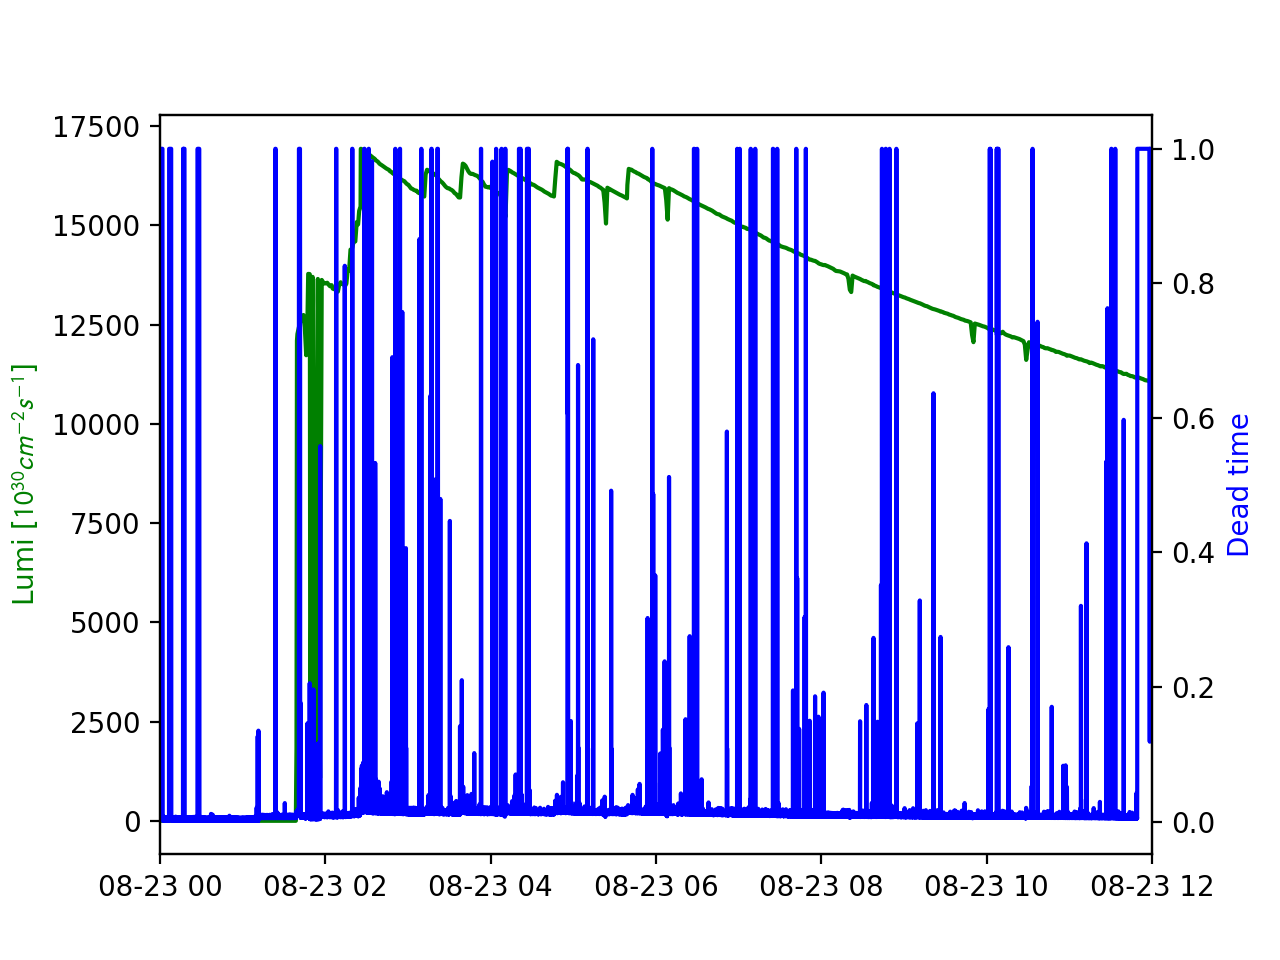

In [8]:
# Plot lumi and DT

#plt.close('all')
plt.figure(1)
ax = plt.gca()
ax2 = ax.twinx()
ax.plot(lumi.x, lumi.y, 'g-', label=r"Lumi [$10^{30} cm^{-2}s^{-1}$]")
ax2.plot(DT.x, DT.y, 'b-', label="DT")
ax.set_ylabel(r"Lumi [$10^{30} cm^{-2}s^{-1}$]", color='g')
ax2.set_ylabel('Dead time', color='b')
ax.set_xlim(left=since-offset); ax.set_xlim(right=till-offset)

plt.savefig('Lumi.pdf', format='pdf')

<IPython.core.display.Javascript object>


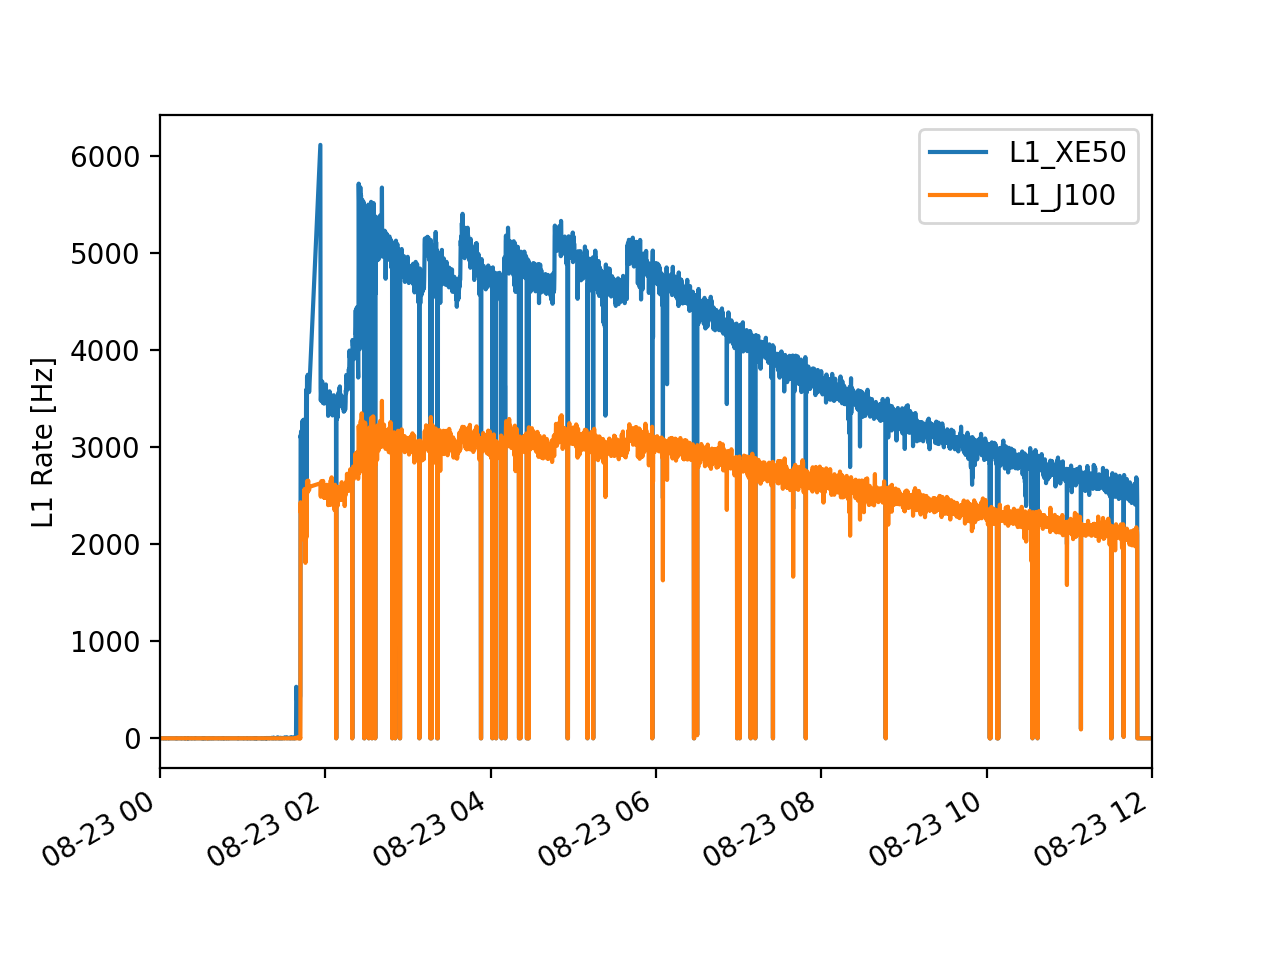

In [9]:
# Plot L1 trigger rates (online)

#plt.close('all')
plt.figure(2)
for tr in range(len(L1_trigger_list)):
    L1_trigger_rates[tr].plot(label=L1_trigger_list[tr])

ax = plt.gca()

ax.set_ylabel('L1 Rate [Hz]')
ax.legend(loc='upper right')
ax.set_xlim(left=since-offset); ax.set_xlim(right=till-offset)

plt.savefig('L1_rates_'+signature+'.pdf', format='pdf')

<IPython.core.display.Javascript object>


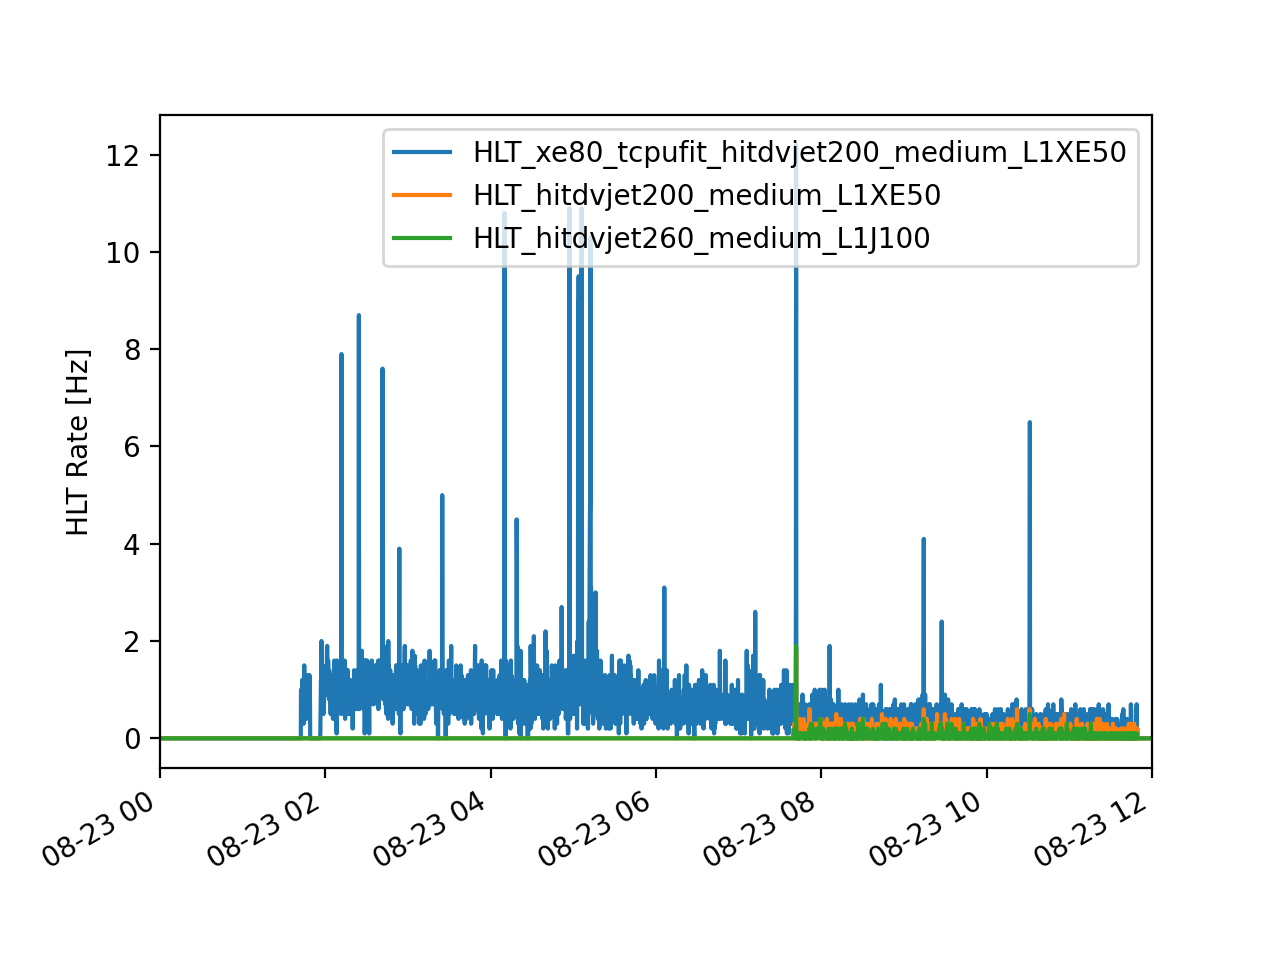

In [10]:
# Plot HLT trigger rates (online)

#plt.close('all')
plt.figure(3)
for tr in range(len(HLT_trigger_list)):
    HLT_trigger_rates[tr].plot(label=HLT_trigger_list[tr])

ax = plt.gca()

ax.set_ylabel('HLT Rate [Hz]')
ax.legend(loc='upper right')
ax.set_xlim(left=since-offset); ax.set_xlim(right=till-offset)

plt.savefig('HLT_rates_'+signature+'.pdf', format='pdf')

In [11]:
# Download the json files with the expected rates from a recent reprocessings, ideally the reprocessing done with the same released as used at P1
# example link: https://atlas-trig-cost.web.cern.ch/data/RateProcessings-2022/r2022-07-20/costMonitoring_rate-prediction-ATR-26000-noPS_360026/rates.json

f = open('rates.json')
data = json.load(f)
#print(data)

HLT_rates = {}
L1_rates = {}

for trig in HLT_trigger_list:
    if trig not in data['level']['HLT']:
        HLT_rates.update({trig: [0.,0.]})
    else:
        #print(data['level']['HLT'][trig])
        HLT_rates.update({trig: [data['level']['HLT'][trig]['rate'],data['level']['HLT'][trig]['rate_err']]})
#print(HLT_rates)

for trig in L1_trigger_list:
    if trig not in data['level']['L1']:
        L1_rates.update({trig: [0.,0.]})
    else:
        #print(data['level']['L1'][trig])
        L1_rates.update({trig: [data['level']['L1'][trig]['rate'],data['level']['L1'][trig]['rate_err']]})
#print(L1_rates)
    
# Closing file
f.close()


In [12]:
# Align timeseries to the lumi series
aligned_HLT_trigger_rates = []
for trig in range(len(HLT_trigger_list)):
    aligned_HLT_trigger_rates += [ HLT_trigger_rates[trig].alignto(lumi) ]
aligned_L1_trigger_rates = []
for trig in range(len(L1_trigger_list)):
    aligned_L1_trigger_rates += [ L1_trigger_rates[trig].alignto(lumi) ]    
#print(aligned_L1_trigger_rates)
aligned_DT = DT.alignto(lumi)
aligned_mu = mu.alignto(lumi)

# create a time series with lumi*DT
for lu in range(len(scaled_lumi.x)):
    scaled_lumi.y[lu] = lumi.y[lu]*(1.-aligned_DT.y[lu])
for trig in range(len(HLT_trigger_list)):
    for lu in range(len(scaled_lumi.x)):
        # rates at 2e34 -> 20000
        expected_HLT_trigger_rates[trig].y[lu] = HLT_rates[HLT_trigger_list[trig]][0]*scaled_lumi.y[lu]/20000
for trig in range(len(L1_trigger_list)):
    for lu in range(len(scaled_lumi.x)):
        # rates at 2e34 -> 20000
        expected_L1_trigger_rates[trig].y[lu] = L1_rates[L1_trigger_list[trig]][0]*scaled_lumi.y[lu]/20000
#print(lumi,aligned_DT,scaled_lumi)
#print(expected_trigger_rates)

<IPython.core.display.Javascript object>


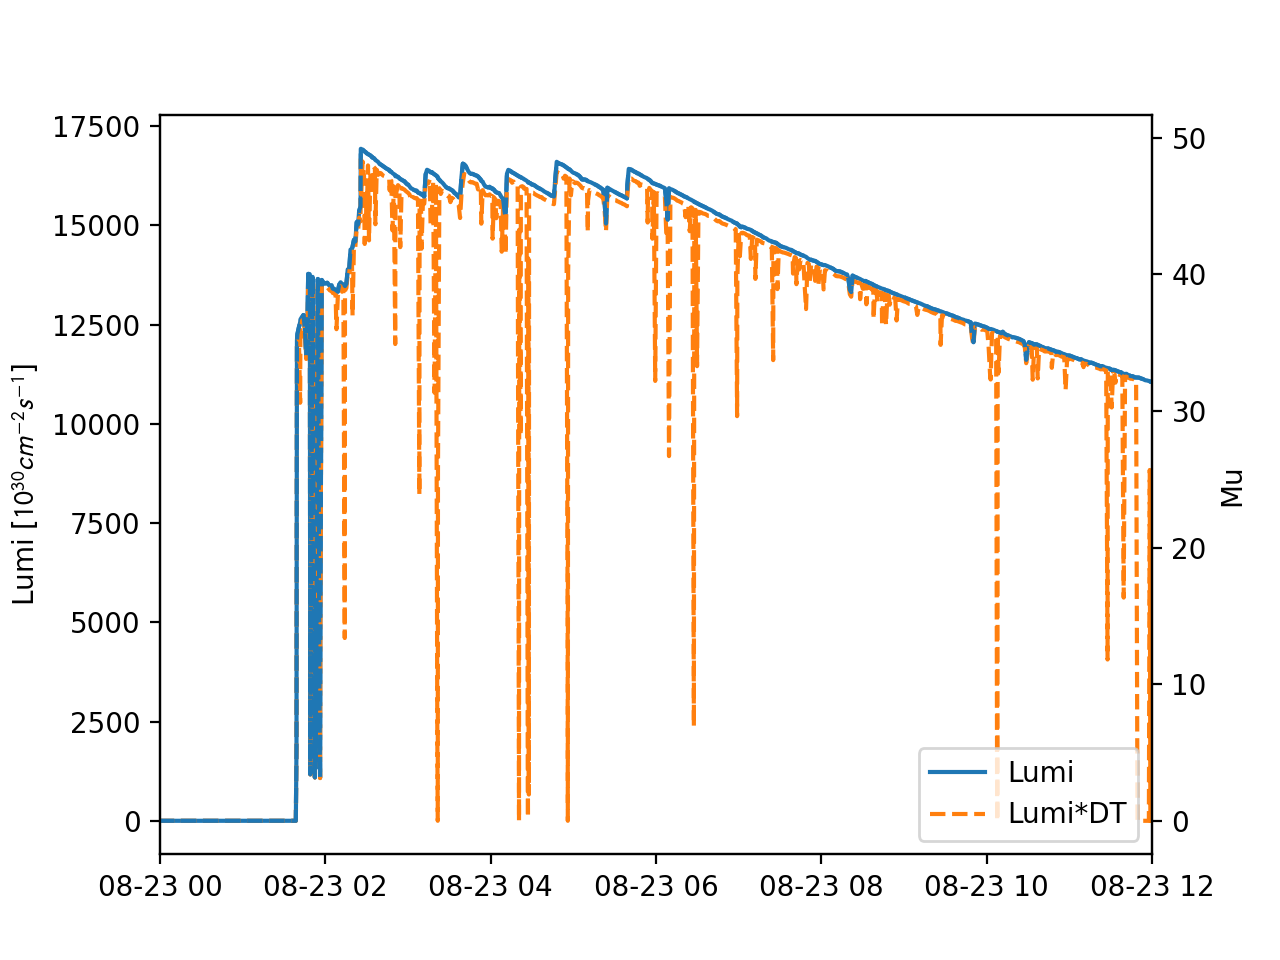

In [13]:
# Plot lumi and lumi*DT and mu

#plt.close('all')
plt.figure(4)
ax = plt.gca()
ax2 = ax.twinx()
ax.plot(lumi.x, lumi.y, '-', label=r"Lumi")
ax.plot(scaled_lumi.x, scaled_lumi.y, '--', label=r"Lumi*DT")
ax2.plot(mu.x, mu.y, '--', label="MU")

ax.set_ylabel(r'Lumi [$10^{30} cm^{-2}s^{-1}$]')
ax2.set_ylabel('Mu')
ax.legend(loc='lower right')
ax.set_xlim(left=since-offset); ax.set_xlim(right=till-offset)

plt.savefig('Scaled_lumi.pdf', format='pdf')

<IPython.core.display.Javascript object>


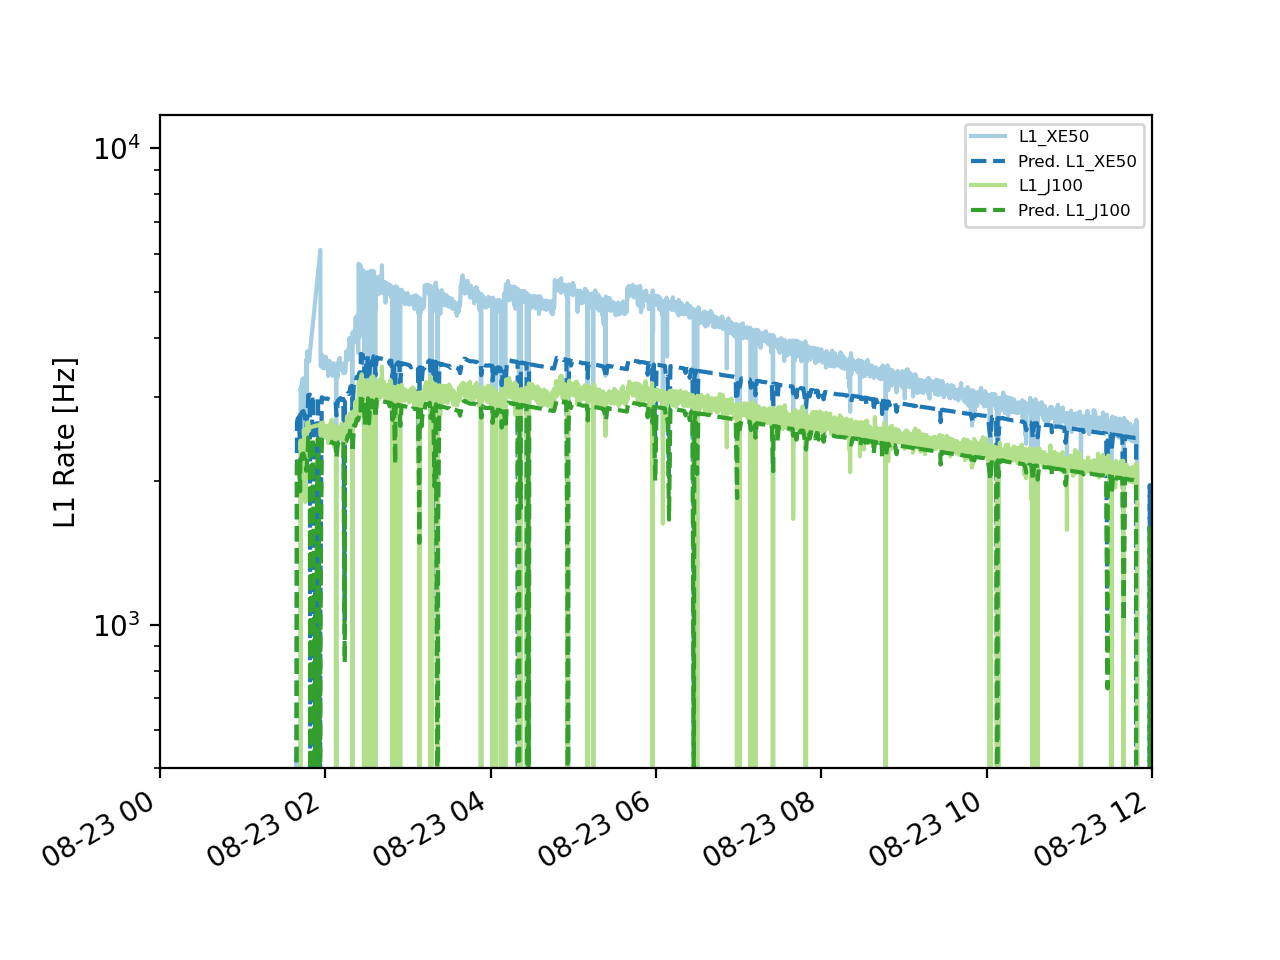

In [14]:
# Plot L1 rates

#plt.close('all')
plt.figure(5)

cmap = plt.get_cmap("Paired")
colors = cmap.colors  
color = iter(colors)

for tr in range(len(L1_trigger_rates)):
    c = next(color)
    L1_trigger_rates[tr].plot(linestyle='-',label=L1_trigger_list[tr],c=c)
    c = next(color)
    expected_L1_trigger_rates[tr].plot(linestyle='--',label="Pred. "+L1_trigger_list[tr],c=c)

ax = plt.gca()
ax.set_yscale('log')
ax.set_ylim([500,None])
ax.set_ylabel('L1 Rate [Hz]')
ax.legend(loc='upper right',prop={'size': 6})
ax.set_xlim(left=since-offset); ax.set_xlim(right=till-offset)

plt.savefig('L1_rates_comp_'+signature+'.pdf', format='pdf')

<IPython.core.display.Javascript object>


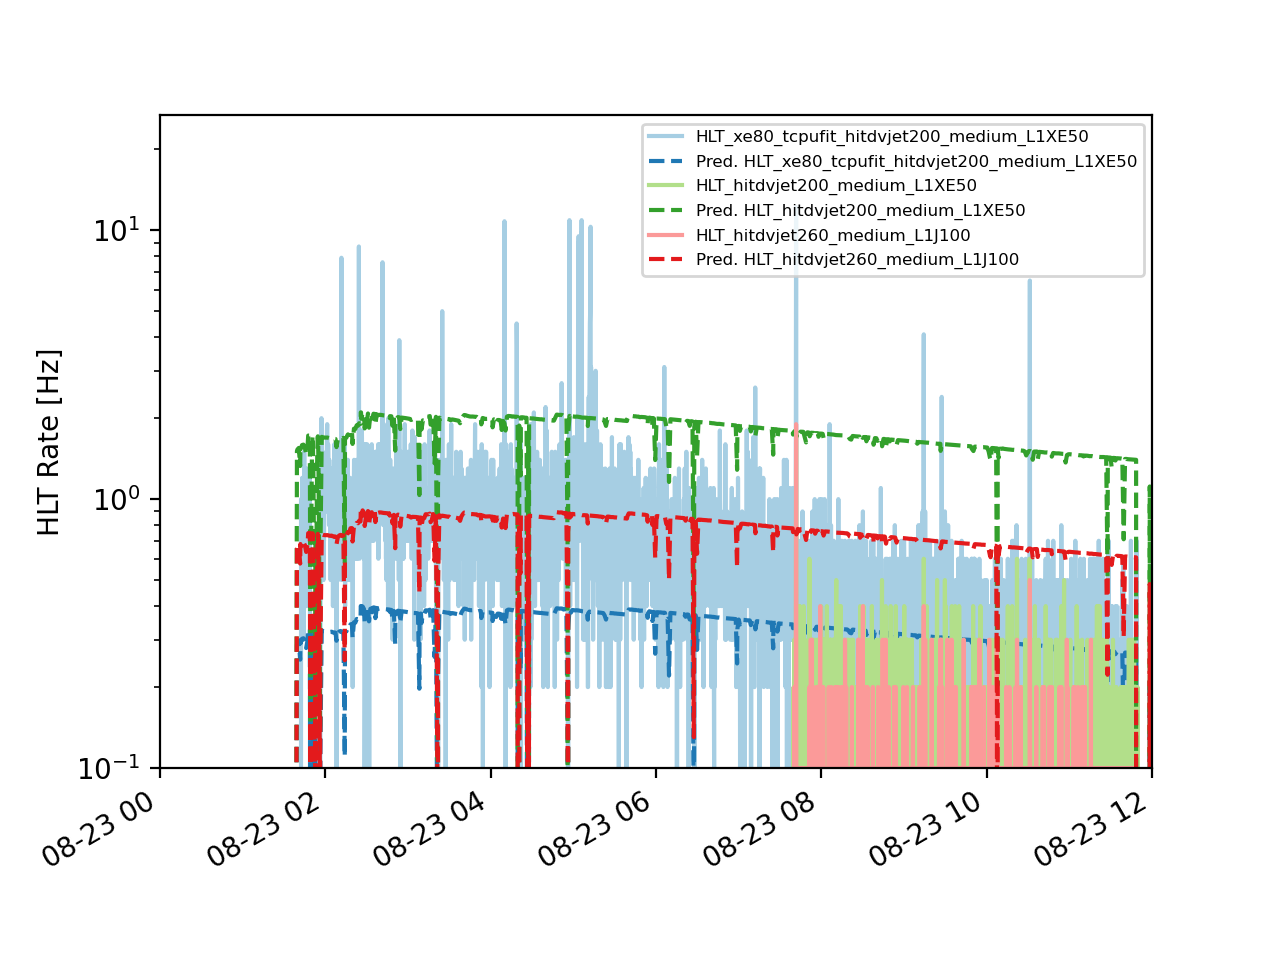

In [15]:
# Plot HLT rates

#plt.close('all')
plt.figure(6)

cmap = plt.get_cmap("Paired")
colors = cmap.colors  
color = iter(colors)

for tr in range(len(HLT_trigger_rates)):
    c = next(color)
    HLT_trigger_rates[tr].plot(linestyle='-',label=HLT_trigger_list[tr],c=c)
    c = next(color)
    expected_HLT_trigger_rates[tr].plot(linestyle='--',label="Pred. "+HLT_trigger_list[tr],c=c)

ax = plt.gca()
ax.set_yscale('log')
ax.set_ylim([0.1,None])
ax.set_ylabel('HLT Rate [Hz]')
ax.legend(loc='upper right',prop={'size': 6})
ax.set_xlim(left=since-offset); ax.set_xlim(right=till-offset)

plt.savefig('HLT_rates_comp_'+signature+'.pdf', format='pdf')

In [16]:
# Acquire the keys
#SMK = beauty.timeseries(since, till, 'ATLAS', 'TrigConfSmKey', 'SuperMasterKey', source='RunParams.TrigConfSmKey')
L1PSK = beauty.timeseries(since, till, 'ATLAS', 'TrigConfL1PsKey', 'L1PrescaleKey', source='RunParams.Physics.L1PsKey')
HLTPSK = beauty.timeseries(since, till, 'ATLAS', 'TrigConfHltPsKey', 'HltPrescaleKey', source='RunParams.Physics.HltPsKey')

# retrieve copies of the lumi to make timeseries for prescales
HLT_prescale_series = []
HLT_enabled_series = []
for trig in range(len(HLT_trigger_list)):
    HLT_prescale_series += [ beauty.timeseries(since, till, 'ATLAS', 'TrigConfHltPsKey', 'HltPrescaleKey', source='RunParams.Physics.HltPsKey') ]
    HLT_enabled_series += [ beauty.timeseries(since, till, 'ATLAS', 'TrigConfHltPsKey', 'HltPrescaleKey', source='RunParams.Physics.HltPsKey') ]
L1_prescale_series = []
L1_enabled_series = []
for trig in range(len(L1_trigger_list)):
    L1_prescale_series += [ beauty.timeseries(since, till, 'ATLAS', 'TrigConfL1PsKey', 'L1PrescaleKey', source='RunParams.Physics.L1PsKey') ]
    L1_enabled_series += [ beauty.timeseries(since, till, 'ATLAS', 'TrigConfL1PsKey', 'L1PrescaleKey', source='RunParams.Physics.L1PsKey') ]


L1PSK_list = []
HLTPSK_list = []
for key in L1PSK[0].y: 
    L1PSK_list += [int(key)]
for key in HLTPSK[0].y: 
    HLTPSK_list += [int(key)]
L1PSK_list = list(set(L1PSK_list))
HLTPSK_list = list(set(HLTPSK_list))
#print(L1PSK_list,HLTPSK_list)

with open('L1_keys.txt', 'w') as f:
    for key in range(len(L1PSK_list)):
        f.write(str(L1PSK_list[key]))
        if key<(len(L1PSK_list)):
            f.write('\n')
f.close()
with open('HLT_keys.txt', 'w') as f:
    for key in range(len(HLTPSK_list)):
        f.write(str(HLTPSK_list[key]))
        if key<(len(HLTPSK_list)):
            f.write('\n')
f.close()

In [17]:
# Open a terminal in lxplus, go to the folder with this project (e.g. $CERNBOX_HOME/SWAN_projects/trigger-rates-with-swan) and run:
# source download_keys.sh
# this will download the json files for the L1 and HLT PS keys

In [18]:
L1_prescales = {}
HLT_prescales = {}
for trig in range(len(L1_trigger_list)):
    L1_prescales.update({L1_trigger_list[trig]: {} })
for trig in range(len(HLT_trigger_list)):
    HLT_prescales.update({HLT_trigger_list[trig]: {} })
#print(L1_prescales,HLT_prescales)
    
for key in L1PSK_list:
    f = open('L1Prescale_'+str(key)+'.json')
    data = json.load(f)
    #print(data)
    for trig in range(len(L1_trigger_list)):
        L1_prescales[L1_trigger_list[trig]].update({key: [data['cutValues'][L1_trigger_list[trig]]['cut'], data['cutValues'][L1_trigger_list[trig]]['enabled'] ]})
#print(L1_prescales)

for key in HLTPSK_list:
    f = open('HLTPrescale_'+str(key)+'.json')
    data = json.load(f)
    #print(data)
    for trig in range(len(HLT_trigger_list)):
        HLT_prescales[HLT_trigger_list[trig]].update({key: [data['prescales'][HLT_trigger_list[trig]]['prescale'], data['prescales'][HLT_trigger_list[trig]]['enabled'] ]})
#print(HLT_prescales)


In [19]:
for trig in range(len(HLT_trigger_list)):
    for time in range(len(HLTPSK[0].x)):
        HLT_prescale_series[trig][0].y[time] = HLT_prescales[HLT_trigger_list[trig]][int(HLTPSK[0].y[time])][0]
        HLT_enabled_series[trig][0].y[time] = HLT_prescales[HLT_trigger_list[trig]][int(HLTPSK[0].y[time])][1]
#print(HLTPSK,HLT_prescale_series,HLT_enabled_series)
for trig in range(len(L1_trigger_list)):
    for time in range(len(L1PSK[0].x)):
        L1_prescale_series[trig][0].y[time] = L1_prescales[L1_trigger_list[trig]][int(L1PSK[0].y[time])][0]
        L1_enabled_series[trig][0].y[time] = L1_prescales[L1_trigger_list[trig]][int(L1PSK[0].y[time])][1]
#print(L1PSK,L1_prescale_series,L1_enabled_series)

<IPython.core.display.Javascript object>


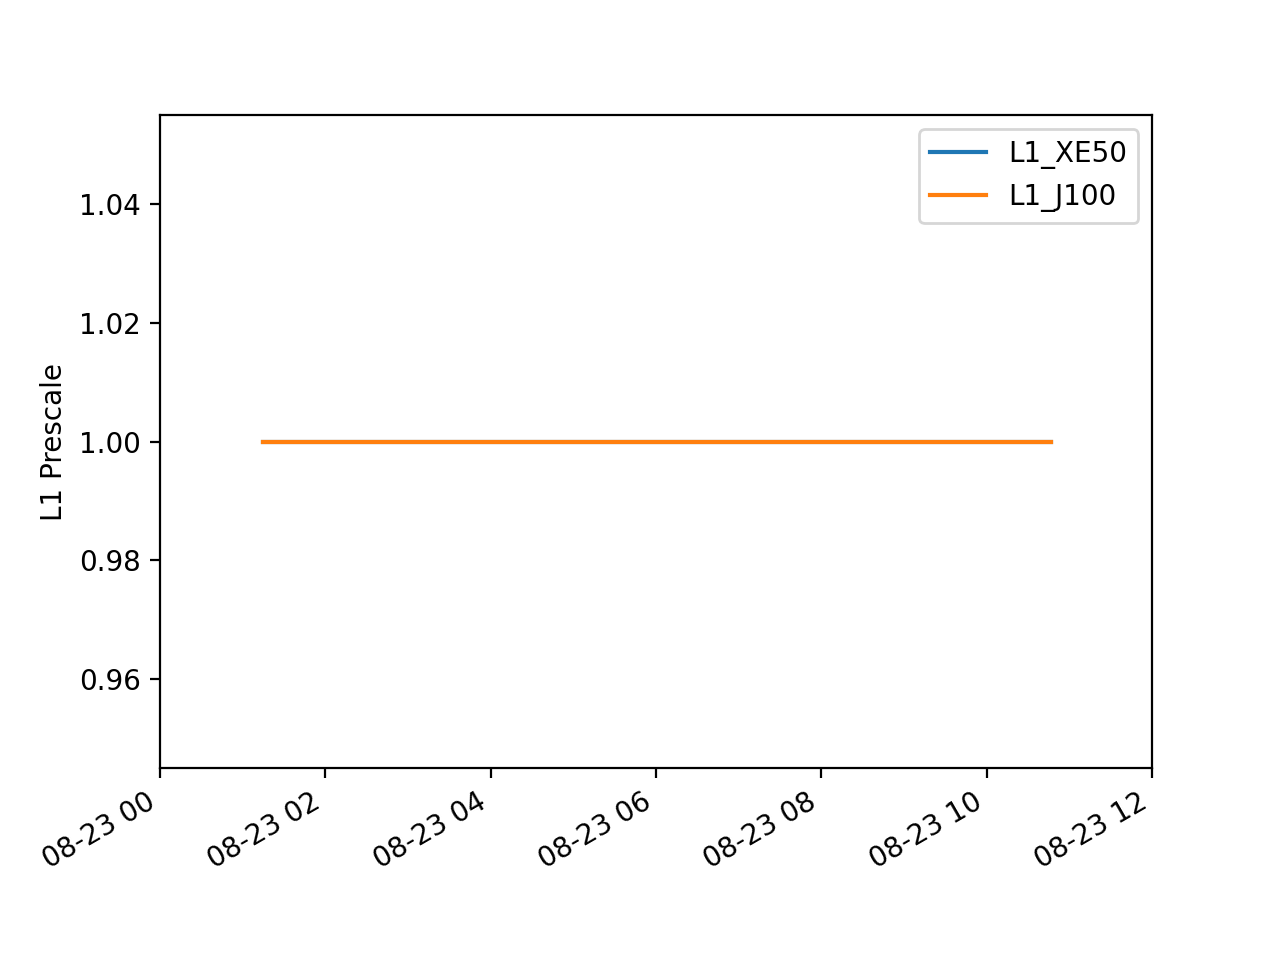

In [20]:
# Plot L1 prescales

#plt.close('all')
plt.figure(7)

for tr in range(len(L1_trigger_list)):
    L1_prescale_series[tr][0].plot(label=L1_trigger_list[tr])

ax = plt.gca()

ax.set_ylabel('L1 Prescale')
ax.legend(loc='upper right')
ax.set_xlim(left=since-offset); ax.set_xlim(right=till-offset)

plt.savefig('L1_prescale_'+signature+'.pdf', format='pdf')

<IPython.core.display.Javascript object>


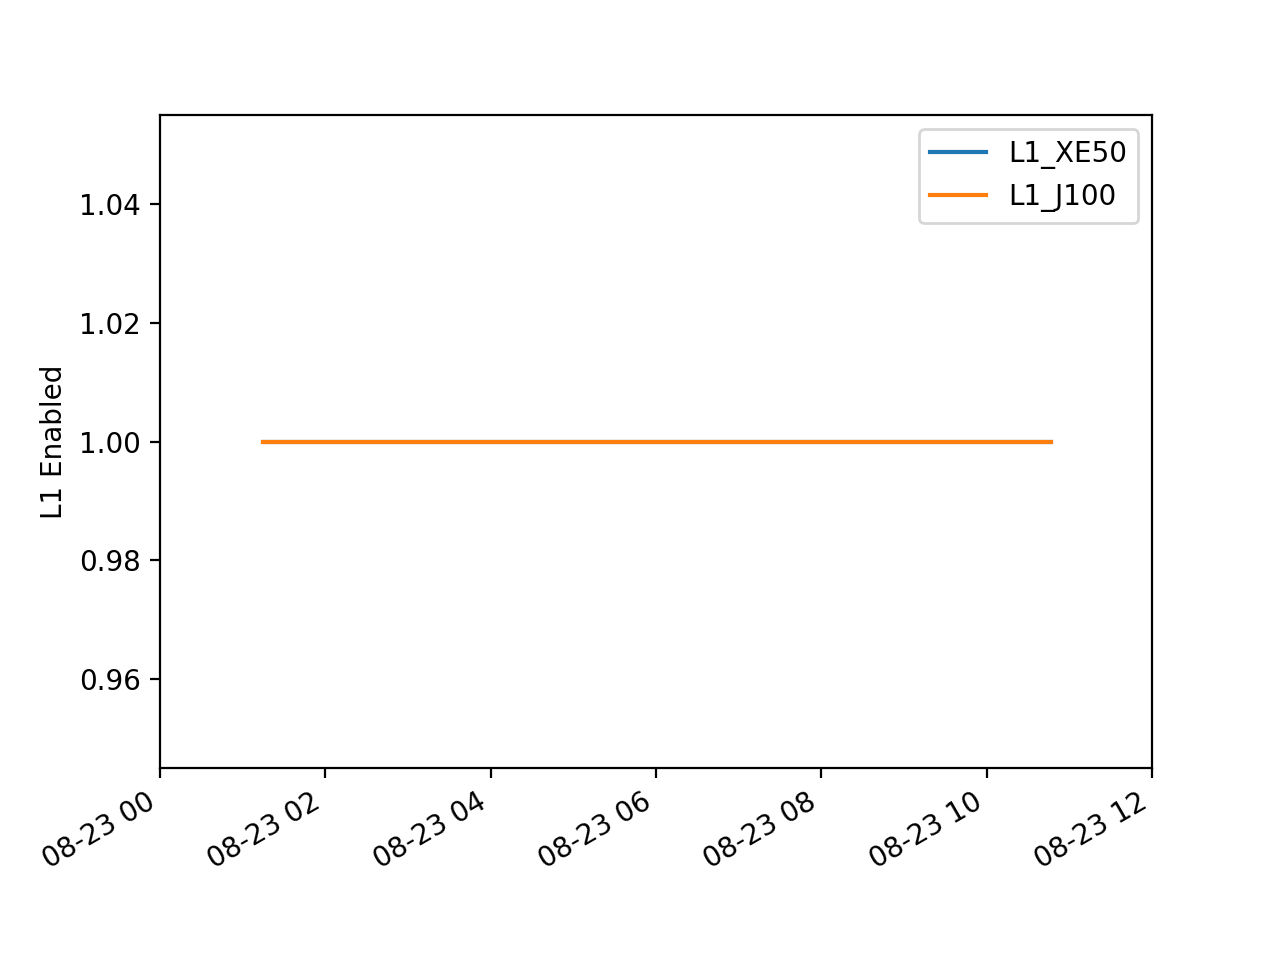

In [21]:
# Plot L1 enabled

#plt.close('all')
plt.figure(8)

for tr in range(len(L1_trigger_list)):
    L1_enabled_series[tr][0].plot(label=L1_trigger_list[tr])

ax = plt.gca()

ax.set_ylabel('L1 Enabled')
ax.legend(loc='upper right')
ax.set_xlim(left=since-offset); ax.set_xlim(right=till-offset)

plt.savefig('L1_enabled_'+signature+'.pdf', format='pdf')

<IPython.core.display.Javascript object>


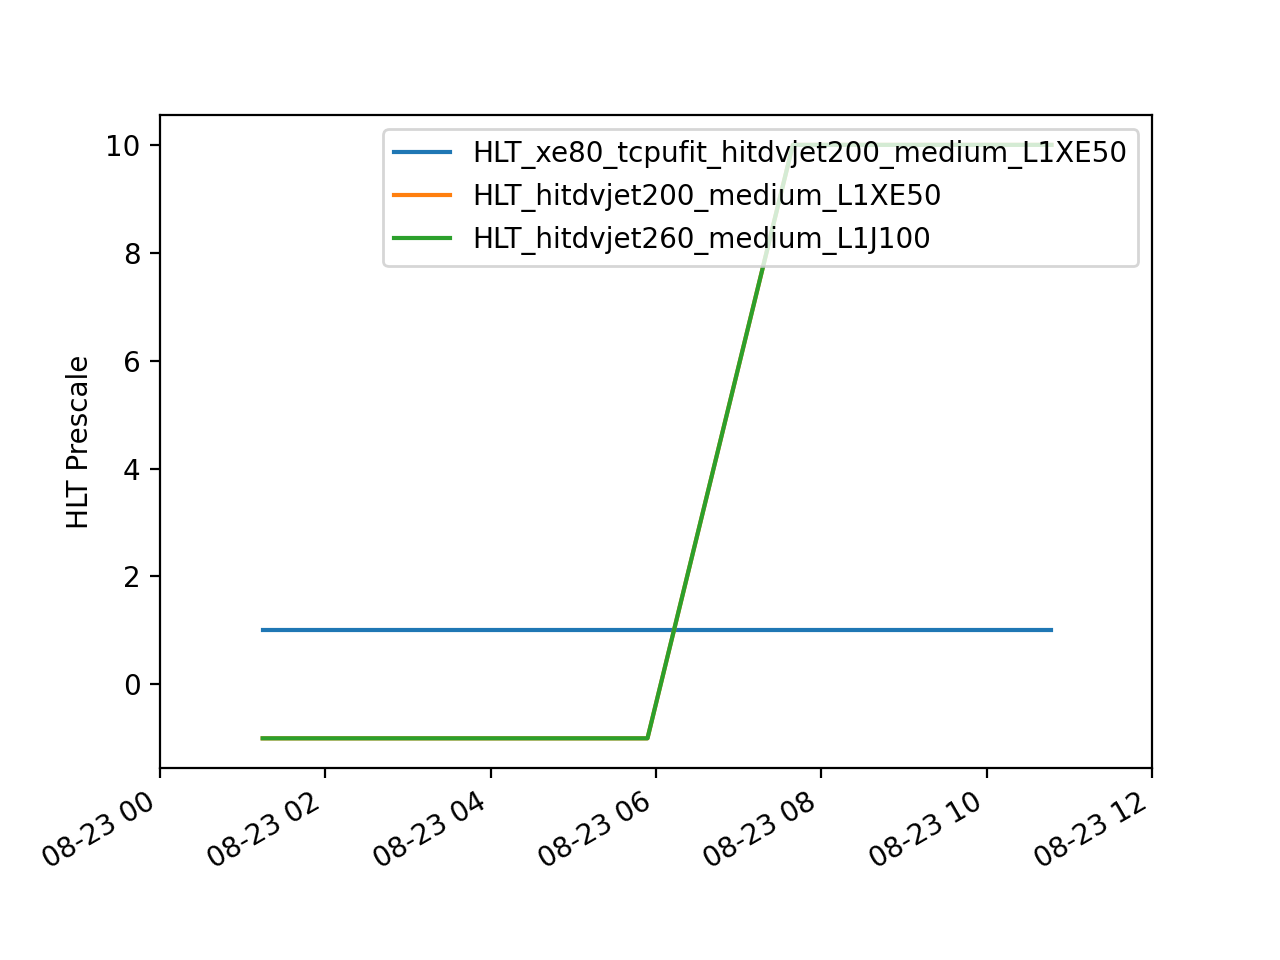

In [22]:
# Plot HLT prescales

#plt.close('all')
plt.figure(9)

for tr in range(len(HLT_trigger_list)):
    HLT_prescale_series[tr][0].plot(label=HLT_trigger_list[tr])

ax = plt.gca()

ax.set_ylabel('HLT Prescale')
ax.legend(loc='upper right')
ax.set_xlim(left=since-offset); ax.set_xlim(right=till-offset)

plt.savefig('HLT_prescale_'+signature+'.pdf', format='pdf')

<IPython.core.display.Javascript object>


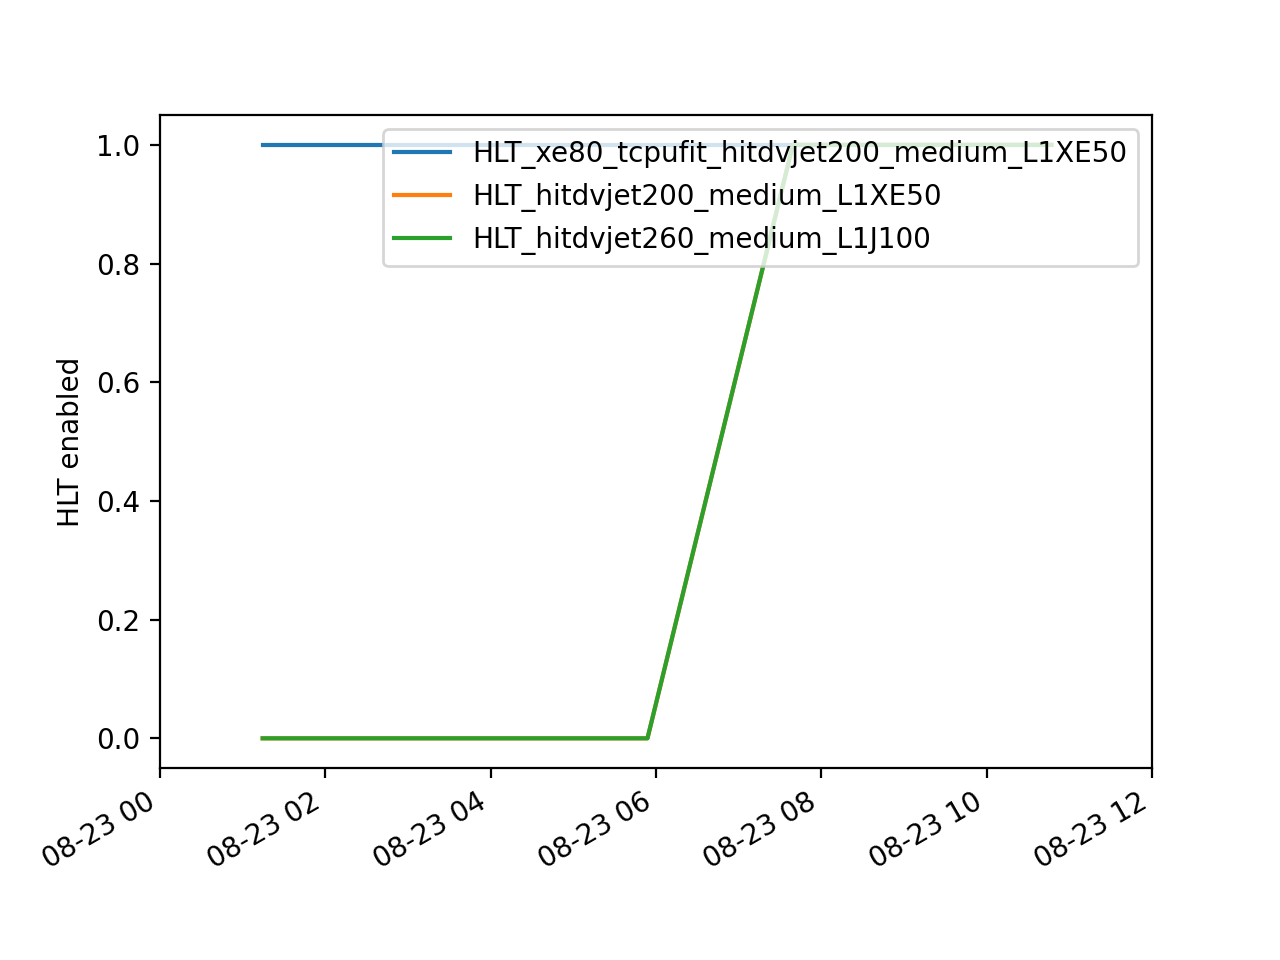

In [23]:
# Plot HLT enabled

#plt.close('all')
plt.figure(10)

for tr in range(len(HLT_trigger_list)):
    HLT_enabled_series[tr][0].plot(label=HLT_trigger_list[tr])

ax = plt.gca()

ax.set_ylabel('HLT enabled')
ax.legend(loc='upper right')
ax.set_xlim(left=since-offset); ax.set_xlim(right=till-offset)

plt.savefig('HLT_enabled_'+signature+'.pdf', format='pdf')

In [24]:
# Below is TODO stuff...

In [25]:
calib_streams = beauty.timeseries(since, till, 'ATLAS', 'SFOngCounters', 'WritingEventRate', source='DF.TopMIG-IS:HLT.Counters..*')
print(calib_streams)


# L1 Rate versus Pileup

#l1rate = beauty.timeseries(since, till, 'ATLAS', 'HLTSV', 'Rate', source='DF.HLTSV.Events')[0]

#pileup = beauty.timeseries(since, till, 'OLC', 'OCLumi', 'Mu', 'OLC.OLCApp/ATLAS_PREFERRED_LBAv_PHYS')[0]
#l1_mu = l1rate.correlate(pileup)
#plt.figure(figsize=(8,8))
#l1_mu.plot()
#plt.xlabel('Pileup')
#plt.ylabel('L1 Rate (Hz)')

[2022-08-22 23:58:00.008241+02:00     0.000000
2022-08-23 00:01:45.006790+02:00     0.000000
2022-08-23 00:01:50.006563+02:00     6.400421
2022-08-23 00:01:55.007727+02:00    48.996456
2022-08-23 00:02:00.006513+02:00    49.404335
                                      ...    
2022-08-23 11:58:35.006964+02:00     0.000000
2022-08-23 11:59:45.007416+02:00     0.000000
2022-08-23 11:59:50.009302+02:00     0.400029
2022-08-23 11:59:55.008387+02:00     3.999735
2022-08-23 12:00:00.008662+02:00     0.000000
Name: DF.TopMIG-IS:HLT.Counters.Global, Length: 8467, dtype: float64, 2022-08-23 01:42:07.983202+02:00    5.995638e-11
2022-08-23 01:42:10.013354+02:00    1.096353e+02
2022-08-23 01:42:15.015231+02:00    1.107979e+02
2022-08-23 01:42:20.015907+02:00    1.099755e+02
2022-08-23 01:42:25.014079+02:00    1.090124e+02
                                        ...     
2022-08-23 11:58:30.009705+02:00    0.000000e+00
2022-08-23 11:59:45.008023+02:00    0.000000e+00
2022-08-23 11:59:50.007464+02:0